# EDA with Python and Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [141]:
df = pd.read_csv(r'C:\Users\lenovo\Downloads\titanic_train.csv')

In [142]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing Values

In [143]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

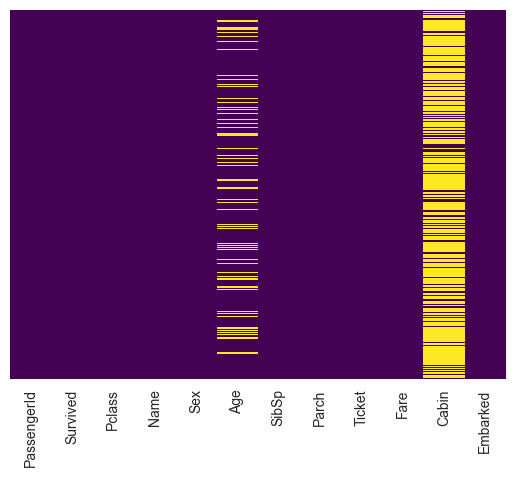

In [144]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap= 'viridis') 
#yticklabel is for removing the y axis values
# cbar for removing the colour bar
#cmap for changing colour

<AxesSubplot:xlabel='Survived', ylabel='count'>

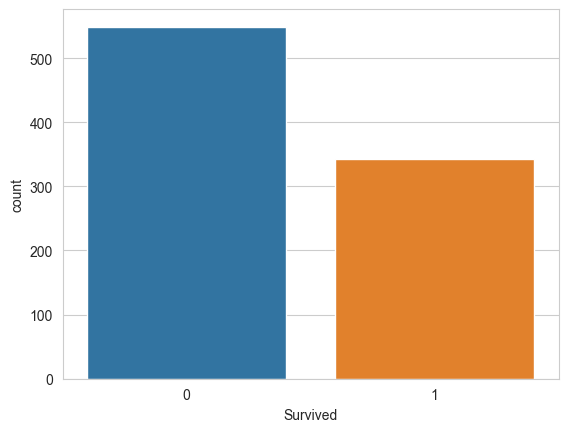

In [145]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

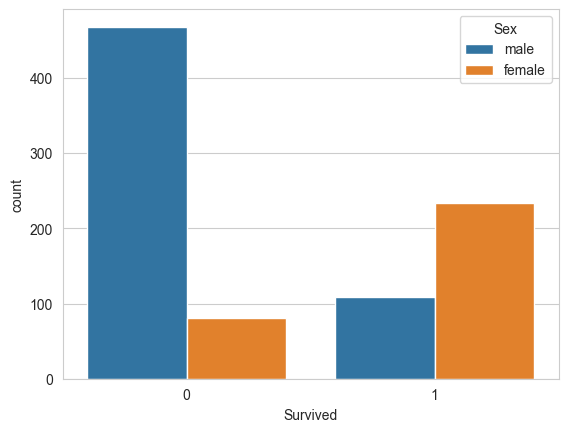

In [146]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = df, hue = 'Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

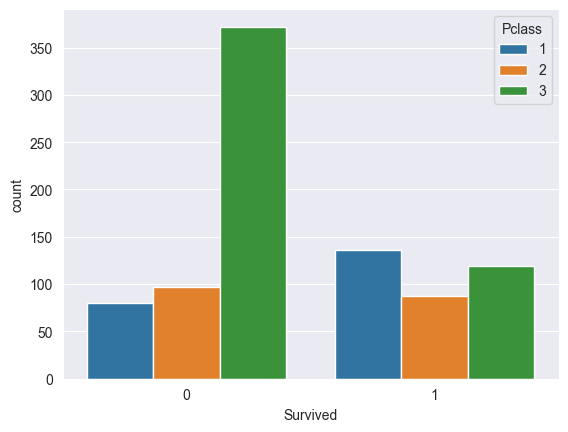

In [147]:
sns.set_style('darkgrid')
sns.countplot(x='Survived', data = df, hue = 'Pclass')

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Age'>

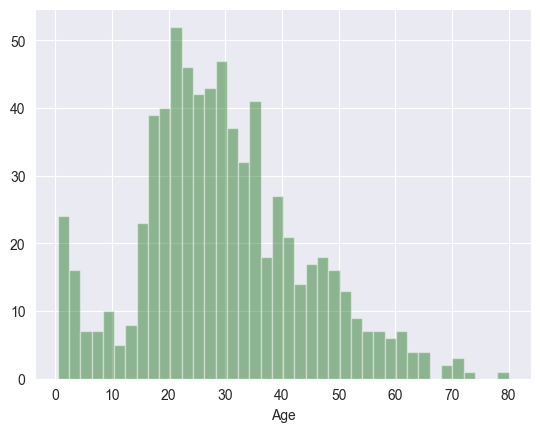

In [148]:
sns.distplot(df['Age'].dropna(), kde = False,bins = 40, color = 'darkgreen')

(array([24., 16.,  7.,  7., 10.,  5.,  8., 23., 39., 40., 52., 46., 42.,
        43., 47., 37., 32., 41., 18., 27., 21., 14., 17., 18., 16., 13.,
         9.,  7.,  7.,  6.,  7.,  4.,  4.,  0.,  2.,  3.,  1.,  0.,  0.,
         1.]),
 array([ 0.42  ,  2.4095,  4.399 ,  6.3885,  8.378 , 10.3675, 12.357 ,
        14.3465, 16.336 , 18.3255, 20.315 , 22.3045, 24.294 , 26.2835,
        28.273 , 30.2625, 32.252 , 34.2415, 36.231 , 38.2205, 40.21  ,
        42.1995, 44.189 , 46.1785, 48.168 , 50.1575, 52.147 , 54.1365,
        56.126 , 58.1155, 60.105 , 62.0945, 64.084 , 66.0735, 68.063 ,
        70.0525, 72.042 , 74.0315, 76.021 , 78.0105, 80.    ]),
 <BarContainer object of 40 artists>)

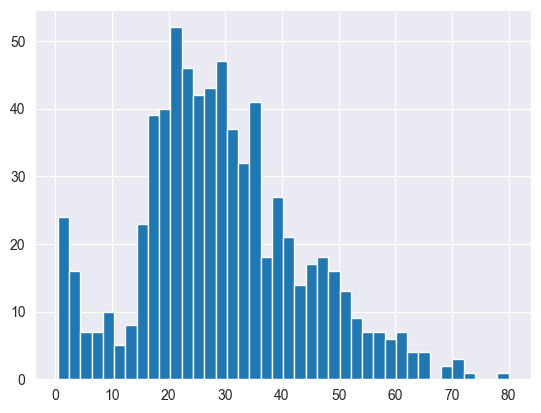

In [149]:
plt.hist(df['Age'],bins = 40) # Same thing using Matplotlib

<AxesSubplot:xlabel='SibSp', ylabel='count'>

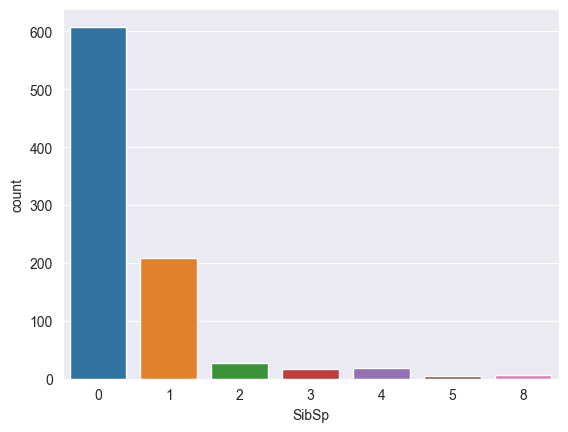

In [150]:
sns.countplot(x= 'SibSp', data = df)

## Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

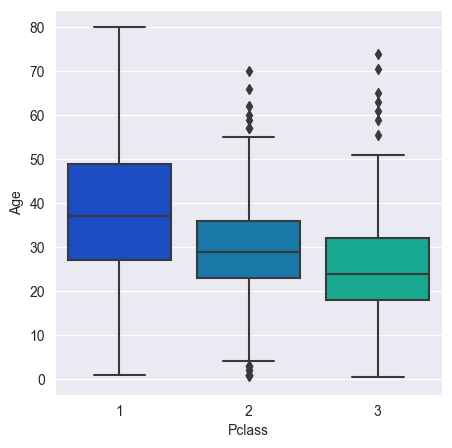

In [151]:
plt.figure(figsize= (5,5))
sns.boxplot(x='Pclass', y='Age', data = df, palette = 'winter')

In [152]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 23

    else:
        return Age

In [153]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis =1)

<AxesSubplot:>

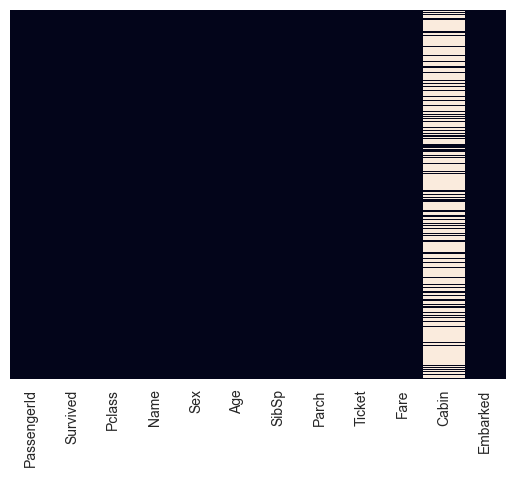

In [154]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [155]:
df.drop('Cabin',axis = 1,inplace= True) 
#when using inplace=False the dataframe operation returns a copy of the dataframe, leaving the original data intact
# and inplace = Truw will modify the data directly

In [156]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<AxesSubplot:>

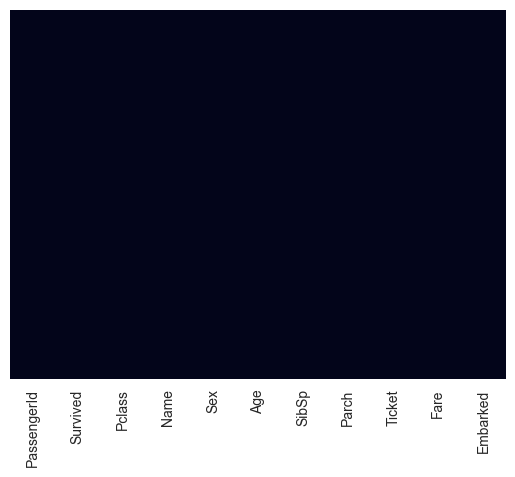

In [157]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False) # Cleanest

In [158]:
df.dropna(inplace= True)

# Coverting Categorical Features
We need to convert categorical features to dummy variables using Pandas. Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [160]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [161]:
sex = pd.get_dummies(['Sex'],drop_first=True)
embarked = pd.get_dummies(df['Embarked'],drop_first=True)

In [162]:
df.drop(['Sex','Embarked','Name','Ticket'], axis =1, inplace = True)

In [163]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [164]:
df = pd.concat([df,sex,embarked],axis =1)

In [165]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1
1,2,1,1,38.0,1,0,71.2833,0,0
2,3,1,3,26.0,0,0,7.9250,0,1
3,4,1,1,35.0,1,0,53.1000,0,1
4,5,0,3,35.0,0,0,8.0500,0,1


'Survived' is the dependant variable where as others are Independant variables.

## Building a Logistic Regression Model

In [169]:
df.drop('Survived', axis = 1).head() # Input Data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Q,S
0,1,3,22.0,1,0,7.2500,0,1
1,2,1,38.0,1,0,71.2833,0,0
2,3,3,26.0,0,0,7.9250,0,1
3,4,1,35.0,1,0,53.1000,0,1
4,5,3,35.0,0,0,8.0500,0,1


In [171]:
df['Survived'].head() # Ouput data

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [178]:
from sklearn.model_selection import train_test_split

In [181]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
df['Survived'], test_size =0.30, random_state = 101)

# Training and Predicting

In [182]:
from sklearn.linear_model import LinearRegression

In [183]:
logmodel = LinearRegression()

In [184]:
logmodel.fit(X_train, y_train)

LinearRegression()

In [185]:
predictions = logmodel.predict(X_test)

In [186]:
from sklearn.metrics import confusion_matrix

In [190]:
accuracy = confusion_matrix(y_test, predictions)

ValueError: Classification metrics can't handle a mix of binary and continuous targets